In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.svm import SVC


In [2]:
data = pd.read_csv("data/league_data_cleaned.csv")

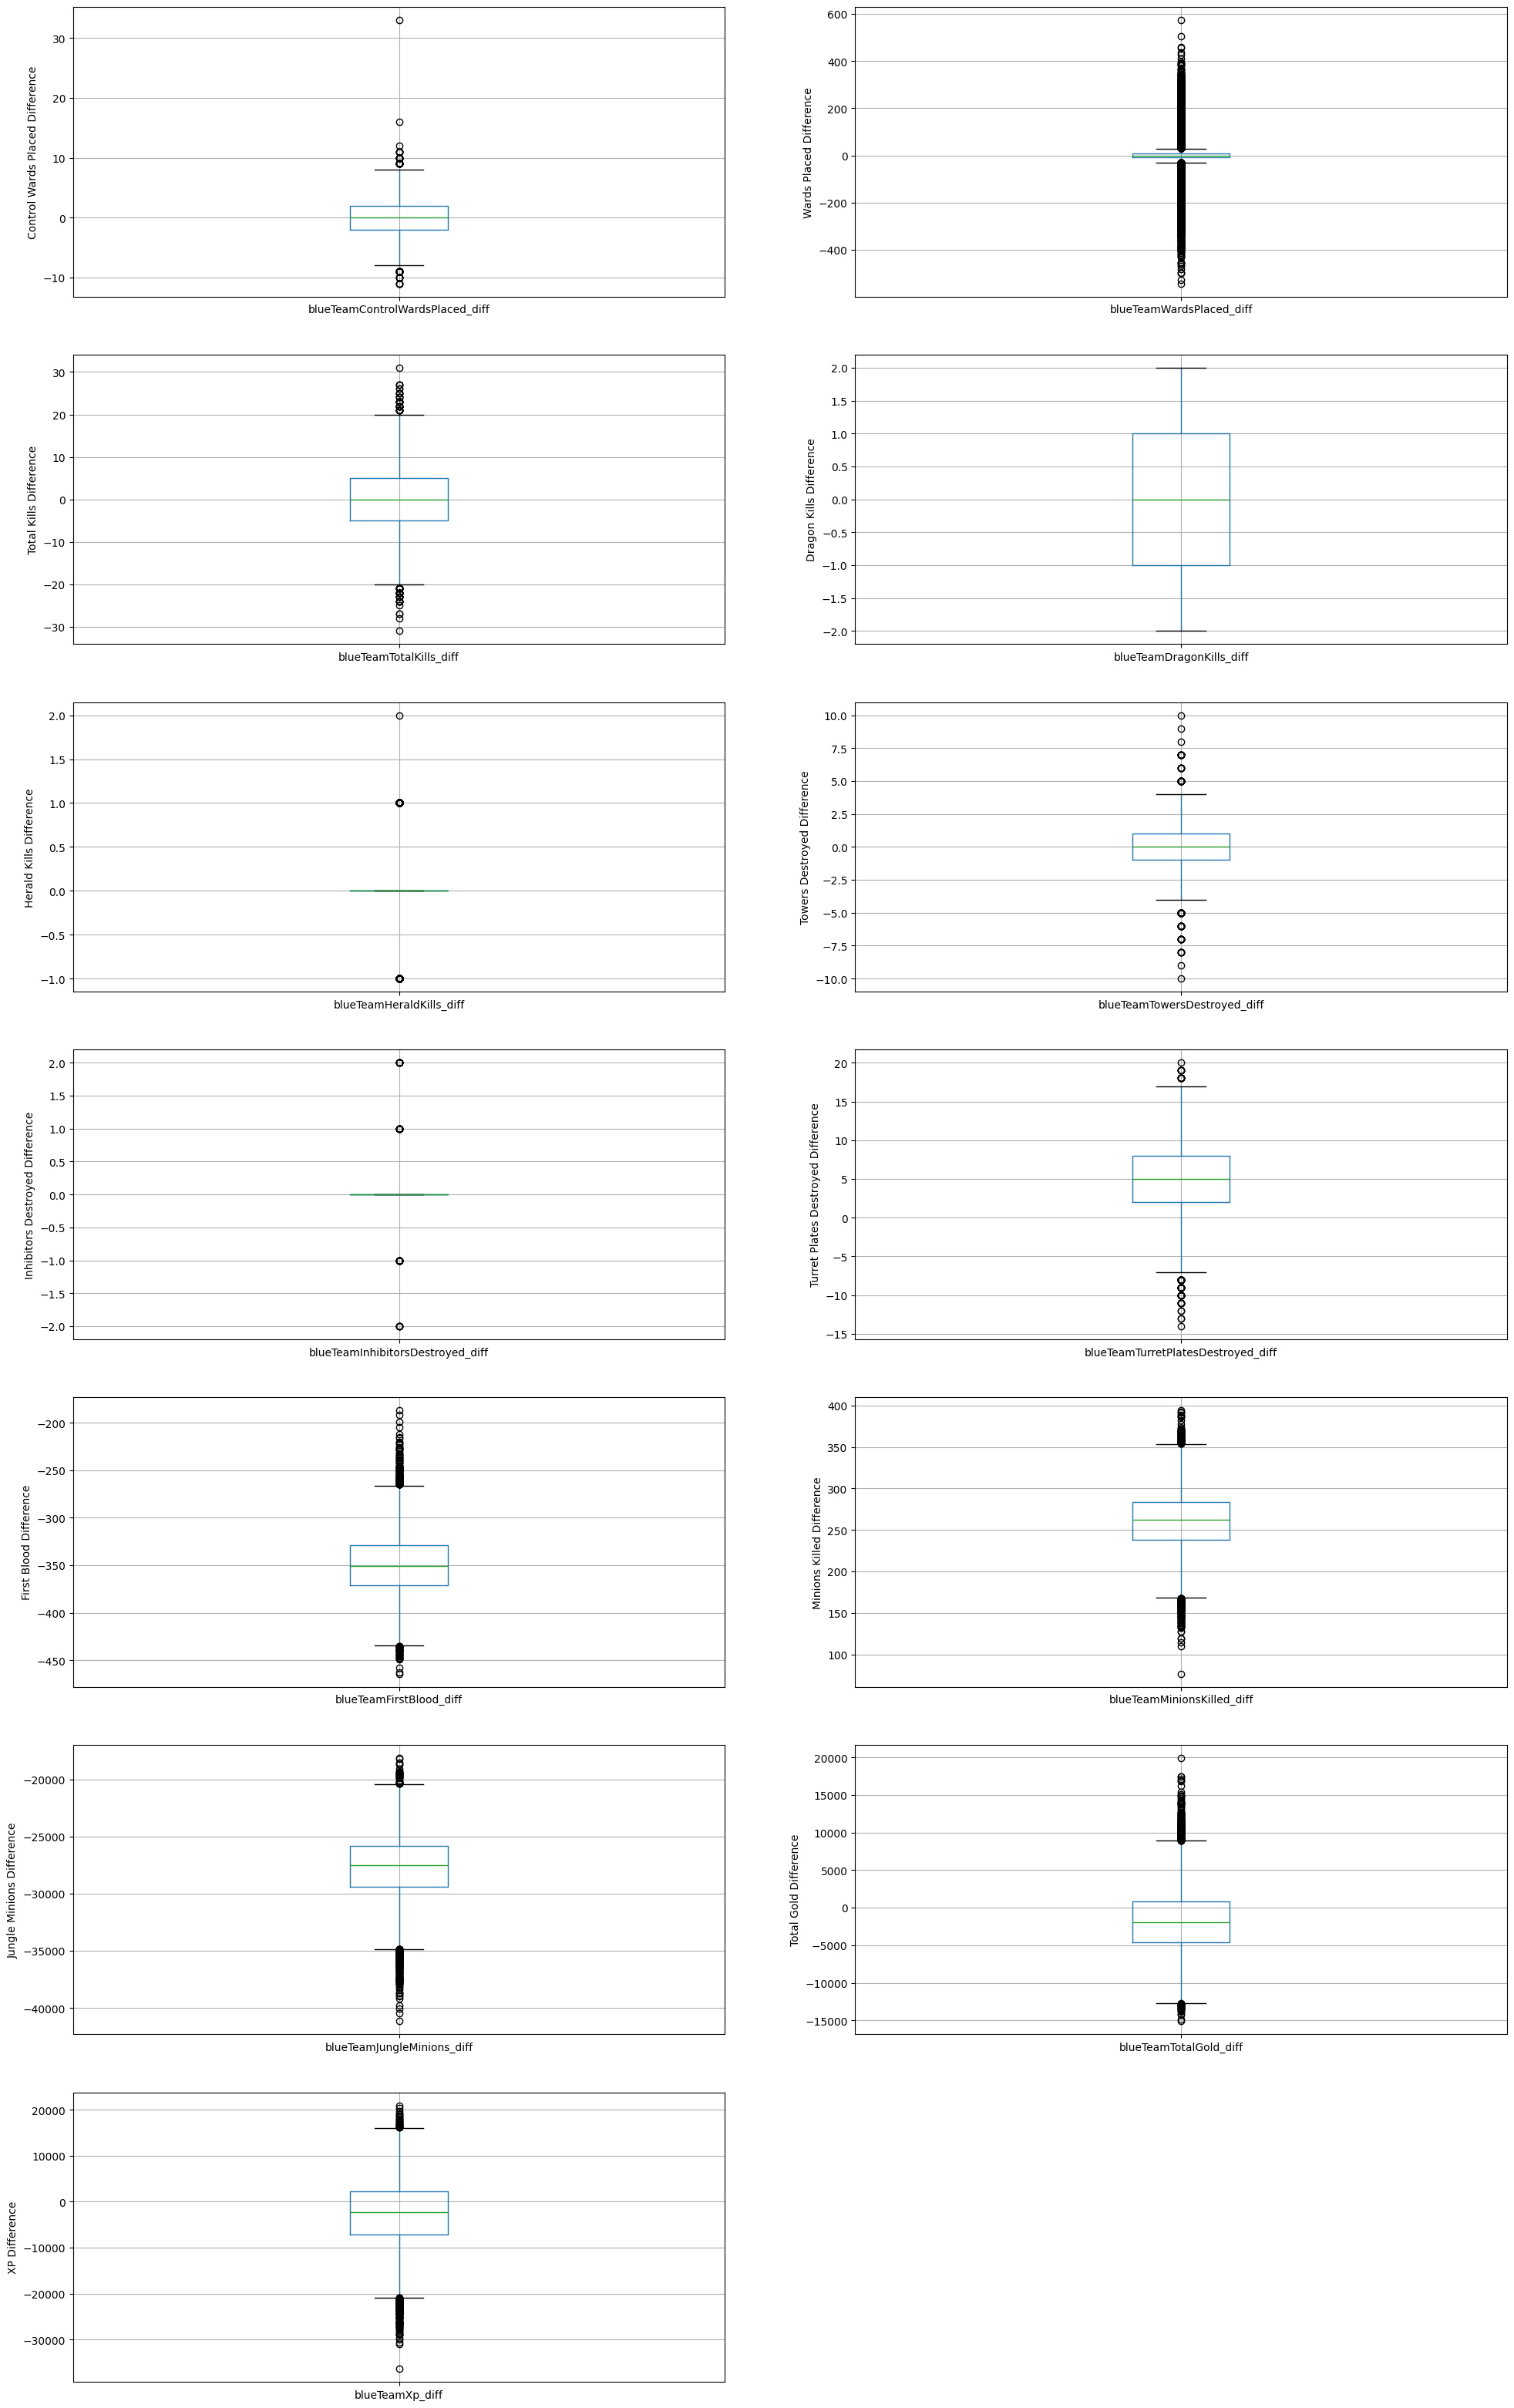

In [3]:
plt.figure(figsize=(24,40))


plt.subplot(7,2,1)
fig = data.boxplot(column = 'blueTeamControlWardsPlaced_diff')
fig.set_title('')
fig.set_ylabel('Control Wards Placed Difference')

plt.subplot(7,2,2)
fig = data.boxplot(column = 'blueTeamWardsPlaced_diff')
fig.set_title('')
fig.set_ylabel('Wards Placed Difference')

plt.subplot(7,2,3)
fig = data.boxplot(column = 'blueTeamTotalKills_diff')
fig.set_title('')
fig.set_ylabel('Total Kills Difference')

plt.subplot(7,2,4)
fig = data.boxplot(column = 'blueTeamDragonKills_diff')
fig.set_title('')
fig.set_ylabel('Dragon Kills Difference')

plt.subplot(7,2,5)
fig = data.boxplot(column = 'blueTeamHeraldKills_diff')
fig.set_title('')
fig.set_ylabel('Herald Kills Difference')

plt.subplot(7,2,6)
fig = data.boxplot(column = 'blueTeamTowersDestroyed_diff')
fig.set_title('')
fig.set_ylabel('Towers Destroyed Difference')

plt.subplot(7,2,7)
fig = data.boxplot(column = 'blueTeamInhibitorsDestroyed_diff')
fig.set_title('')
fig.set_ylabel('Inhibitors Destroyed Difference')

plt.subplot(7,2,8)
fig = data.boxplot(column = 'blueTeamTurretPlatesDestroyed_diff')
fig.set_title('')
fig.set_ylabel('Turret Plates Destroyed Difference')


plt.subplot(7,2,9)
fig = data.boxplot(column = 'blueTeamFirstBlood_diff')
fig.set_title('')
fig.set_ylabel('First Blood Difference')

plt.subplot(7,2,10)
fig = data.boxplot(column = 'blueTeamMinionsKilled_diff')
fig.set_title('')
fig.set_ylabel('Minions Killed Difference')

plt.subplot(7,2,11)
fig = data.boxplot(column = 'blueTeamJungleMinions_diff')
fig.set_title('')
fig.set_ylabel('Jungle Minions Difference')

plt.subplot(7,2,12)
fig = data.boxplot(column = 'blueTeamTotalGold_diff')
fig.set_title('')
fig.set_ylabel('Total Gold Difference')

plt.subplot(7,2,13)
fig = data.boxplot(column = 'blueTeamXp_diff')
fig.set_title('')
fig.set_ylabel('XP Difference')

plt.show()

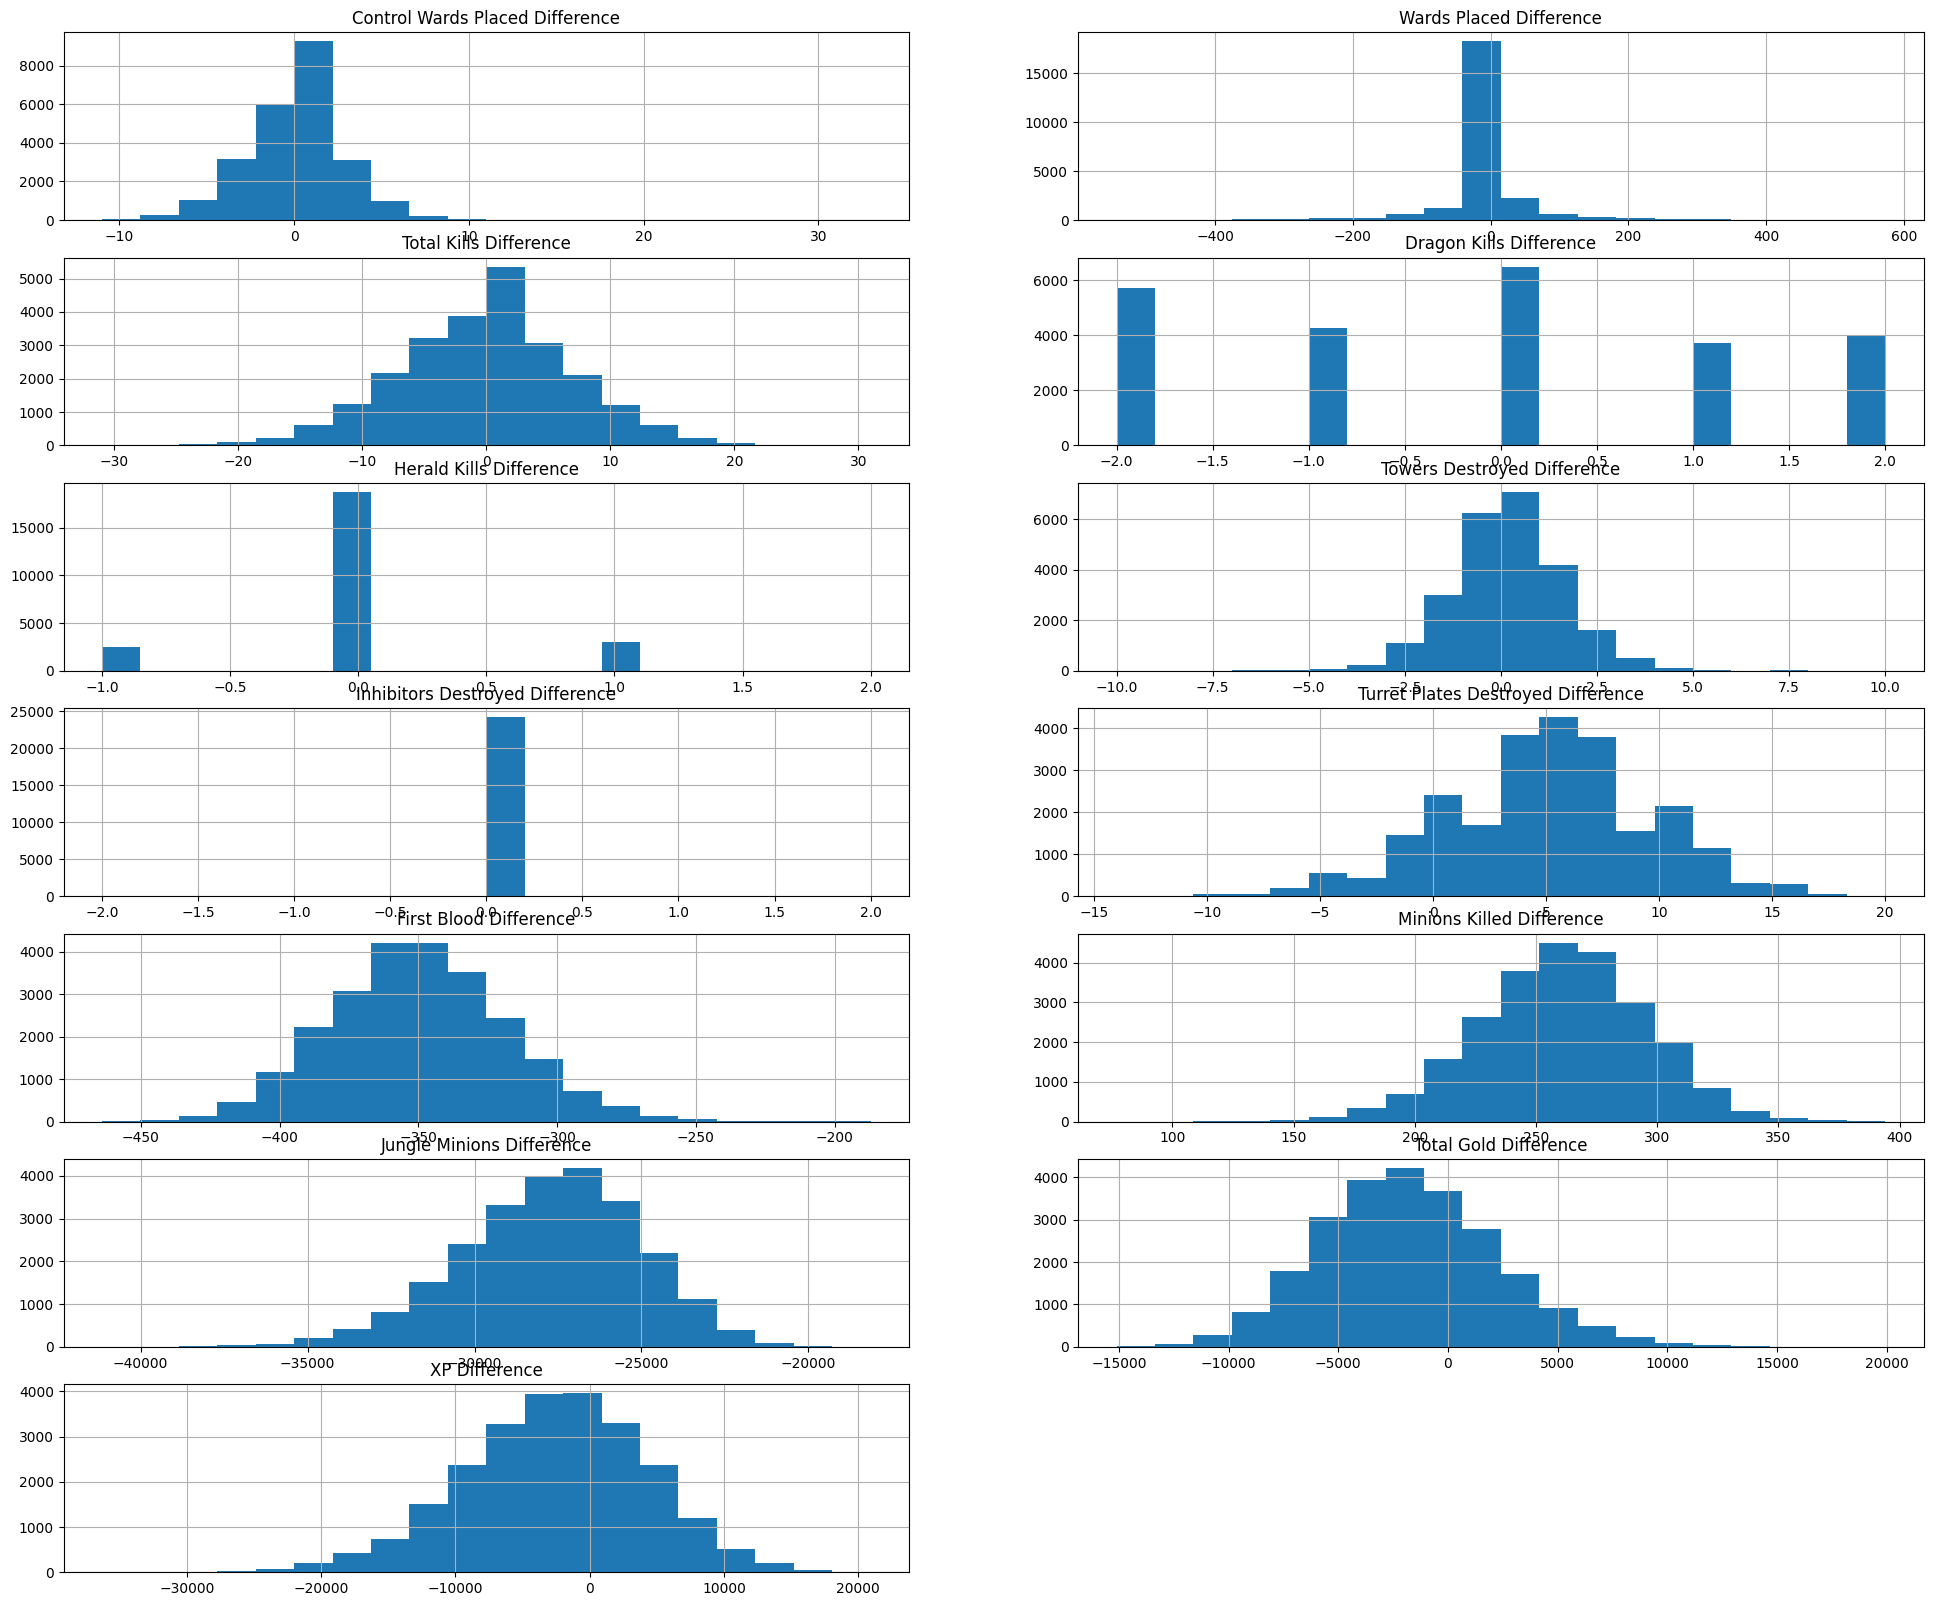

In [4]:
plt.figure(figsize=(24, 20))

plt.subplot(7,2,1)
fig = data['blueTeamControlWardsPlaced_diff'].hist(bins=20)
fig.set_title('Control Wards Placed Difference')

plt.subplot(7,2,2)
fig = data['blueTeamWardsPlaced_diff'].hist(bins=20)
fig.set_title('Wards Placed Difference')

plt.subplot(7,2,3)
fig = data['blueTeamTotalKills_diff'].hist(bins=20)
fig.set_title('Total Kills Difference')

plt.subplot(7,2,4)
fig = data['blueTeamDragonKills_diff'].hist(bins=20)
fig.set_title('Dragon Kills Difference')

plt.subplot(7,2,5)
fig = data['blueTeamHeraldKills_diff'].hist(bins=20)
fig.set_title('Herald Kills Difference')

plt.subplot(7,2,6)
fig = data['blueTeamTowersDestroyed_diff'].hist(bins=20)
fig.set_title('Towers Destroyed Difference')

plt.subplot(7,2,7)
fig = data['blueTeamInhibitorsDestroyed_diff'].hist(bins=20)
fig.set_title('Inhibitors Destroyed Difference')

plt.subplot(7,2,8)
fig = data['blueTeamTurretPlatesDestroyed_diff'].hist(bins=20)
fig.set_title('Turret Plates Destroyed Difference')

plt.subplot(7,2,9)
fig = data['blueTeamFirstBlood_diff'].hist(bins=20)
fig.set_title('First Blood Difference')

plt.subplot(7,2,10)
fig = data['blueTeamMinionsKilled_diff'].hist(bins=20)
fig.set_title('Minions Killed Difference')

plt.subplot(7,2,11)
fig = data['blueTeamJungleMinions_diff'].hist(bins=20)
fig.set_title('Jungle Minions Difference')

plt.subplot(7,2,12)
fig = data['blueTeamTotalGold_diff'].hist(bins=20)
fig.set_title('Total Gold Difference')

plt.subplot(7,2,13)
fig = data['blueTeamXp_diff'].hist(bins=20)
fig.set_title('XP Difference')

plt.show()

In [5]:
X = data.drop(['matchId', 'blueWin'], axis=1)  
y = data['blueWin']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_test.shape, X_train.shape

((4844, 13), (19374, 13))

In [8]:
cols = X_train.columns

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [11]:
X_train.describe()

,blueTeamControlWardsPlaced_diff,blueTeamWardsPlaced_diff,blueTeamTotalKills_diff,blueTeamDragonKills_diff,blueTeamHeraldKills_diff,blueTeamTowersDestroyed_diff,blueTeamInhibitorsDestroyed_diff,blueTeamTurretPlatesDestroyed_diff,blueTeamFirstBlood_diff,blueTeamMinionsKilled_diff,blueTeamJungleMinions_diff,blueTeamTotalGold_diff,blueTeamXp_diff
count,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04,1.937400e+04
mean,1.026902e-17,-2.934005e-18,-1.026902e-17,4.034257e-17,-1.714559e-17,1.283627e-17,4.034257e-18,4.896121e-17,1.188272e-16,-2.310529e-16,4.919960e-16,5.097834e-17,6.234761e-18
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-3.856036e+00,-8.424192e+00,-4.350706e+00,-1.322928e+00,-2.137158e+00,-6.644426e+00,-2.842583e+01,-4.186760e+00,-3.604519e+00,-4.398319e+00,-4.998327e+00,-3.297025e+00,-4.137491e+00
25%,-6.931722e-01,-9.079346e-02,-6.948972e-01,-5.991508e-01,-3.930630e-02,-4.833042e-01,-1.173288e-02,-6.649613e-01,-6.658145e-01,-6.319856e-01,-6.384767e-01,-6.972676e-01,-6.489546e-01
50%,9.686344e-03,1.824166e-02,8.142986e-03,1.246269e-01,-3.930630e-02,2.012649e-01,-1.173288e-02,-4.624020e-03,-3.383507e-02,1.033492e-02,5.579423e-02,-4.251532e-02,3.683981e-02
75%,7.125449e-01,1.428532e-01,7.111831e-01,8.484046e-01,-3.930630e-02,8.858339e-01,-1.173288e-02,6.557133e-01,6.613423e-01,6.818518e-01,7.014160e-01,6.355126e-01,6.963064e-01
max,1.160685e+01,7.884347e+00,3.804560e+00,1.572182e+00,4.156398e+00,7.046955e+00,2.840237e+01,3.076950e+00,5.148396e+00,3.893454e+00,3.552030e+00,5.379108e+00,3.417265e+00


In [12]:
svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7508257638315442


In [13]:
linear_svc = SVC(kernel = 'linear', C=1.0)

linear_svc.fit(X_train, y_train)

y_pred_test = linear_svc.predict(X_test)

print('Accuracy with linear kernel and C=1.0: ', accuracy_score(y_test, y_pred_test))

Accuracy with linear kernel and C=1.0:  0.7533030553261767


In [14]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([1, 0, 1, ..., 0, 0, 0])

In [15]:
print('Trainig-set accuracy score: ', accuracy_score(y_train, y_pred_train))


Trainig-set accuracy score:  0.7604005368018995


In [16]:
print('Training set score: ', linear_svc.score(X_train, y_train)) 
print('Test set score: ', linear_svc.score(X_test, y_test))

Training set score:  0.7604005368018995
Test set score:  0.7533030553261767


In [17]:
y_test.value_counts()

blueWin
0    2463
1    2381
Name: count, dtype: int64

In [18]:
null_accuracy = (2463/(2463+2381))
print('Null accuracy score:', null_accuracy)

Null accuracy score: 0.5084640792733278


## SVM: Polynomial kernel

In [19]:
poly_svc = SVC(kernel = 'poly', C=1.0)

poly_svc.fit(X_train, y_train)

y_pred=poly_svc.predict(X_test)

print('Accuracy with polynomial kernel and C=1.0: ', accuracy_score(y_test, y_pred))

Accuracy with polynomial kernel and C=1.0:  0.7526837324525186


In [20]:
poly_svc = SVC(kernel = 'poly', C=100.0)

poly_svc.fit(X_train, y_train)

y_pred=poly_svc.predict(X_test)

print('Accuracy with polynomial kernel and C=100.0: ', accuracy_score(y_test, y_pred))

Accuracy with polynomial kernel and C=100.0:  0.7520644095788604


## SVM: Sigmoid kernel

In [21]:
sigmoid_svc = SVC(kernel='sigmoid', C=1.0)

sigmoid_svc.fit(X_train, y_train)

y_pred = sigmoid_svc.predict(X_test)

print('Accuracy with sigmoid kernel and C=1.0: ', accuracy_score(y_test, y_pred))

Accuracy with sigmoid kernel and C=1.0:  0.6676300578034682


In [22]:
sigmoid_svc = SVC(kernel='sigmoid', C=100.0)

sigmoid_svc.fit(X_train, y_train)

y_pred = sigmoid_svc.predict(X_test)

print('Accuracy with sigmoid kernel and C=100.0: ', accuracy_score(y_test, y_pred))

Accuracy with sigmoid kernel and C=100.0:  0.6676300578034682


## SVM: Confusion Matrix

In [23]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion Matrix: \n', cm)
print('\nTrue Positives: ', cm[0,0])
print('\nTrue Negatives: ', cm[1,1])
print('\nFalse Positives: ', cm[0,1])
print('\nFalse Negatives: ', cm[1,0])

Confusion Matrix: 
 [[1868  595]
 [ 600 1781]]

True Positives:  1868

True Negatives:  1781

False Positives:  595

False Negatives:  600


<Axes: >

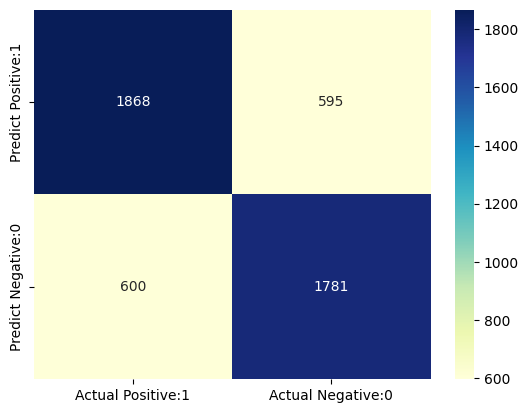

In [24]:
cm_matrix = pd.DataFrame(data=cm, columns = ['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2463
           1       0.75      0.75      0.75      2381

    accuracy                           0.75      4844
   macro avg       0.75      0.75      0.75      4844
weighted avg       0.75      0.75      0.75      4844



In [26]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [27]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: ', classification_accuracy)

Classification accuracy:  0.7533030553261767


In [28]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error: ', classification_error)

Classification error:  0.24669694467382328


In [29]:
precision = TP / float(TP + FP)
print('Precision: ', precision)

Precision:  0.7584246853430775


In [30]:
recall = TP / float(TP + FN)
print('Recall: ', recall)

Recall:  0.7568881685575365


In [31]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate: ', true_positive_rate)

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate: ', false_positive_rate)

True Positive Rate:  0.7568881685575365
False Positive Rate:  0.25042087542087543


In [32]:
specificity = TN / (TN + FP)
print('Specificity: ', specificity)

Specificity:  0.7495791245791246


## ROC - AUC

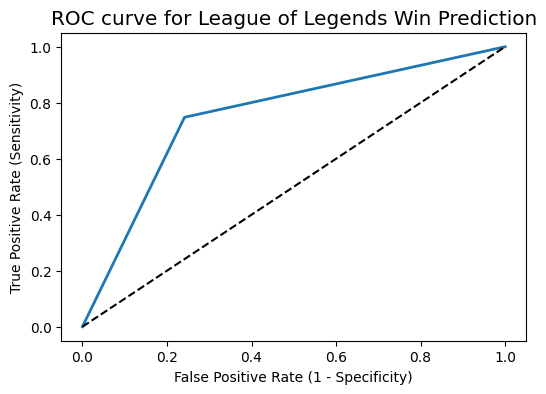

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for League of Legends Win Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [34]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC: ', ROC_AUC)

ROC AUC:  0.7532148626211398


In [35]:
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=20, scoring='roc_auc').mean()
print('Cross-validated ROC AUC: ', Cross_validated_ROC_AUC)

Cross-validated ROC AUC:  0.8429933654497799


In [36]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, random_state=0, shuffle=True)

linear_svc = SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X_train, y_train, cv=kfold)

print('Cross-validated scores with linear kernel: ', linear_scores)

Cross-validated scores with linear kernel:  [0.75509677 0.75535484 0.76180645 0.76877419 0.75193598]


In [37]:
print('Average cross-validated score with linear kernel: ', linear_scores.mean())

Average cross-validated score with linear kernel:  0.7585936483088248


In [38]:
rbf_svc = SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

print('Stratified cross-validated scores with rbf kernel: ', rbf_scores)

Stratified cross-validated scores with rbf kernel:  [0.74607762 0.7510322  0.74752271 0.75428453 0.75428453]


In [39]:
print('Average stratified cross-validated score with rbf kernel: ', rbf_scores.mean())

Average stratified cross-validated score with rbf kernel:  0.7506403207707993
